In [1]:
#import all the relevant libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import preprocessing

In [2]:
#load the dataset into a variable named data
data=pd.read_csv('DRUG BATCH SIDE EFFECTS DATASET 0.1.csv')

In [3]:
data.head()

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,Aaban,M,topamax,41.0,White,Mild Side Effects
1,Aaban,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,Aabha,F,tazorac,31.0,White,Mild Side Effects
3,Aabha,F,voltaren,44.0,White,Severe Side Effects
4,Aabid,M,tramadol,24.0,White,No Side Effects


In [4]:
data.tail()

,NAME,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
399995,TRUE,M,lamisil,50.0,White,Severe Side Effects
399996,TRUE,M,klaron,55.0,"Hispanic, White",No Side Effects
399997,TRUE,M,celexa,57.0,Other,Severe Side Effects
399998,TRUE,F,zoloft,59.0,White,No Side Effects
399999,TRUE,M,prilosec,65.0,White,Mild Side Effects


In [5]:
data.shape

(400000, 6)

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400000 entries, 0 to 399999
Data columns (total 6 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   NAME          400000 non-null  object 
 1   GENDER        400000 non-null  object 
 2   DRUG NAME     400000 non-null  object 
 3   AGE           399980 non-null  float64
 4   RACE          400000 non-null  object 
 5   SIDE EFFECTS  400000 non-null  object 
dtypes: float64(1), object(5)
memory usage: 18.3+ MB


# Inference

The data has 400000 rows and 6 columns.Most of the features are object data type.

# EDA (Exploratory data analysis)

<function matplotlib.pyplot.show(close=None, block=None)>

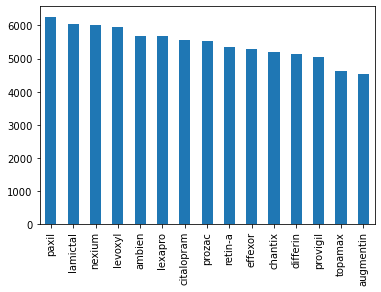

In [7]:
#Checking value counts of "DRUG NAME"
data['DRUG NAME'].value_counts().head(15).plot(kind='bar')
plt.show

# Inference

paxil is most used drug

In [8]:
#Checking value counts of "GENDER"
data["GENDER"].value_counts()

F    237751
M    162249
Name: GENDER, dtype: int64

(array([0, 1]), [Text(0, 0, 'M'), Text(1, 0, 'F')])

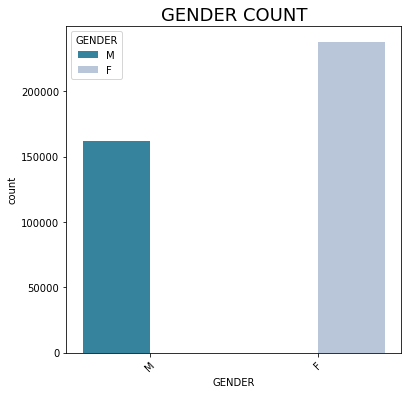

In [9]:
data["GENDER"].value_counts()
plt.figure(figsize=(6,6))
sns.countplot(x='GENDER',hue='GENDER',data=data,palette="PuBuGn_r")
plt.title("GENDER COUNT",fontsize=18 )
plt.xticks(rotation=45)

# Inference

from the Gender count we can see that highest counts are Females which are much more than males in this dataset

In [10]:
#Checking value counts of "RACE"
data["RACE"].value_counts()

White              314074
Hispanic, White     44072
Black               35845
Unknown              3046
Hispanic, Black      1673
Other                1010
Asian, Other          168
Asian Indian          104
Chinese                 8
Name: RACE, dtype: int64

(array([0, 1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(0, 0, 'White'),
  Text(1, 0, 'Hispanic, White'),
  Text(2, 0, 'Unknown'),
  Text(3, 0, 'Black'),
  Text(4, 0, 'Other'),
  Text(5, 0, 'Hispanic, Black'),
  Text(6, 0, 'Asian, Other'),
  Text(7, 0, 'Asian Indian'),
  Text(8, 0, 'Chinese')])

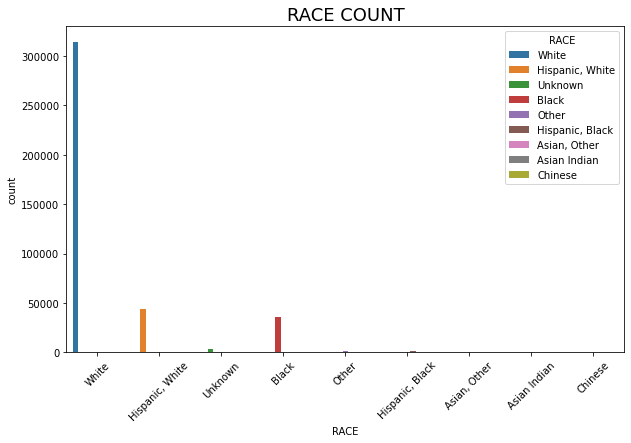

In [11]:
data["RACE"].value_counts()
plt.figure(figsize=(10,6))
sns.countplot(x='RACE',hue='RACE',data=data)
plt.title("RACE COUNT",fontsize=18 )
plt.xticks(rotation=45)

# Inference

According to the value counts of "RACE", white categorized peoples are taken the most drugs consuming for their treatments and the chinese are the least.

In [12]:
#Checking Unique values of "SIDE EFFECTS"
data["SIDE EFFECTS"].unique()

array(['Mild Side Effects', 'Extremely Severe Side Effects',
       'Severe Side Effects', 'No Side Effects', 'Moderate Side Effects'],
      dtype=object)

(array([0, 1, 2, 3, 4]),
 [Text(0, 0, 'Mild Side Effects'),
  Text(1, 0, 'Extremely Severe Side Effects'),
  Text(2, 0, 'Severe Side Effects'),
  Text(3, 0, 'No Side Effects'),
  Text(4, 0, 'Moderate Side Effects')])

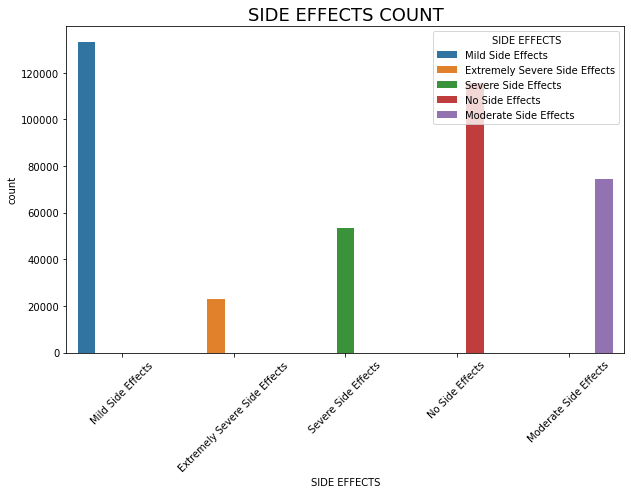

In [13]:
data["SIDE EFFECTS"].value_counts()
plt.figure(figsize=(10,6))
sns.countplot(x='SIDE EFFECTS',hue='SIDE EFFECTS',data=data)
plt.title("SIDE EFFECTS COUNT",fontsize=18 )
plt.xticks(rotation=45)

# Inference

According to the "side effects" count, Mild Side Effects are top most side effects which found basis of the EDA on this Side effects column

# Pre-processing

In [14]:
#Checking the null values in column "AGE"
data.isna().sum()

NAME             0
GENDER           0
DRUG NAME        0
AGE             20
RACE             0
SIDE EFFECTS     0
dtype: int64

# Inference

There are missing values in the AGE.

In [15]:
#filling the missing values in age with respect to the median of Age.
data['AGE'] = data['AGE'] .fillna( data['AGE'].median())

In [16]:
data.isna().sum()

NAME            0
GENDER          0
DRUG NAME       0
AGE             0
RACE            0
SIDE EFFECTS    0
dtype: int64

In [17]:
#Drop the column "Name" which doesn't give any contribution for the modelling
data = data.drop(['NAME'], axis = 1)
data.head(5)

,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,M,topamax,41.0,White,Mild Side Effects
1,M,zocor,53.0,"Hispanic, White",Extremely Severe Side Effects
2,F,tazorac,31.0,White,Mild Side Effects
3,F,voltaren,44.0,White,Severe Side Effects
4,M,tramadol,24.0,White,No Side Effects


# Find out the outliers in the data

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


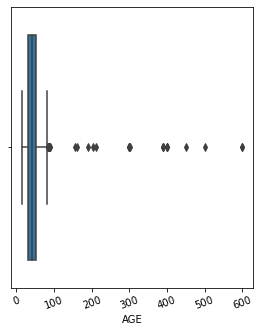

In [18]:
plt.figure(figsize=(20,30))
features = [ 'AGE']
for i in enumerate(features): 
    ax = plt.subplot(5, 4, i[0]+1)
    sns.boxplot(data[i[1]])
    plt.xticks(rotation = 20)

In [19]:
# Calculate quartile values for 'AGE' using 30,60 and 90 percentile values
Q1=np.percentile(data["AGE"],30,interpolation= "midpoint")
Q2=np.percentile(data["AGE"],60,interpolation= "midpoint")
Q3=np.percentile(data["AGE"],90,interpolation= "midpoint")
print("value of Q1:",Q1)
print("value of Q2:",Q2)
print("value of Q3:",Q3)

value of Q1: 34.0
value of Q2: 45.0
value of Q3: 57.0


In [20]:
data["AGE"].median()

41.0

In [21]:
IQR= Q3-Q1

In [22]:
Upper_lim= Q3+1.5*IQR
Lower_lim=Q1-1.5*IQR
print("Upper limit value is:",Upper_lim)
print("Lower limit value is:",Lower_lim)

Upper limit value is: 91.5
Lower limit value is: -0.5


In [23]:
outlier=[]
for x in data["AGE"]:
    if((x>Upper_lim)or(x<Lower_lim)):
        outlier.append(x)

In [24]:
outlier

[300.0,
 302.0,
 500.0,
 400.0,
 203.0,
 160.0,
 400.0,
 191.0,
 450.0,
 390.0,
 155.0,
 300.0,
 390.0,
 600.0,
 211.0,
 600.0,
 401.0,
 300.0,
 390.0]

In [25]:
for i in ['AGE']:
    Q1=data[i].quantile(0.25)  
    Q3=data[i].quantile(0.75)    
    IQR=Q3-Q1
    low_limit=Q1-1.5*IQR
    up_limit=Q3+1.5*IQR    
    for j in data[i]:    
        if j > up_limit or j < low_limit:     
            data[i] = data[i].replace(j, np.median(data[i]))  

C:\Users\user\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


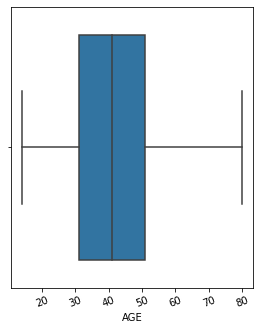

In [26]:
plt.figure(figsize=(20,30))
features = [ 'AGE']
for i in enumerate(features): 
    ax = plt.subplot(5, 4, i[0]+1)
    sns.boxplot(data[i[1]])
    plt.xticks(rotation = 20)

# Inference

In this case we're taking quartile values for 'AGE' using 30,60 and 90 percentile values Because according to the age logically maximum life expactancy is about 80-90 years in rare case it's upto 102-110.so we conclude to detect the outliers and removed it using median imputation methode for the better accuracy in model.

#  Encoding 

In [27]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
column=['GENDER','DRUG NAME','RACE','SIDE EFFECTS']
for i in column:
    data[i] = le.fit_transform(data[i])
    

In [28]:
data.head()

,GENDER,DRUG NAME,AGE,RACE,SIDE EFFECTS
0,1,435,41.0,8,1
1,1,491,53.0,5,0
2,0,425,31.0,8,1
3,0,470,44.0,8,4
4,1,439,24.0,8,3


# Feature Selection- Correlation

<AxesSubplot:title={'center':'Heatmap of the  Data befor feature reduction'}>

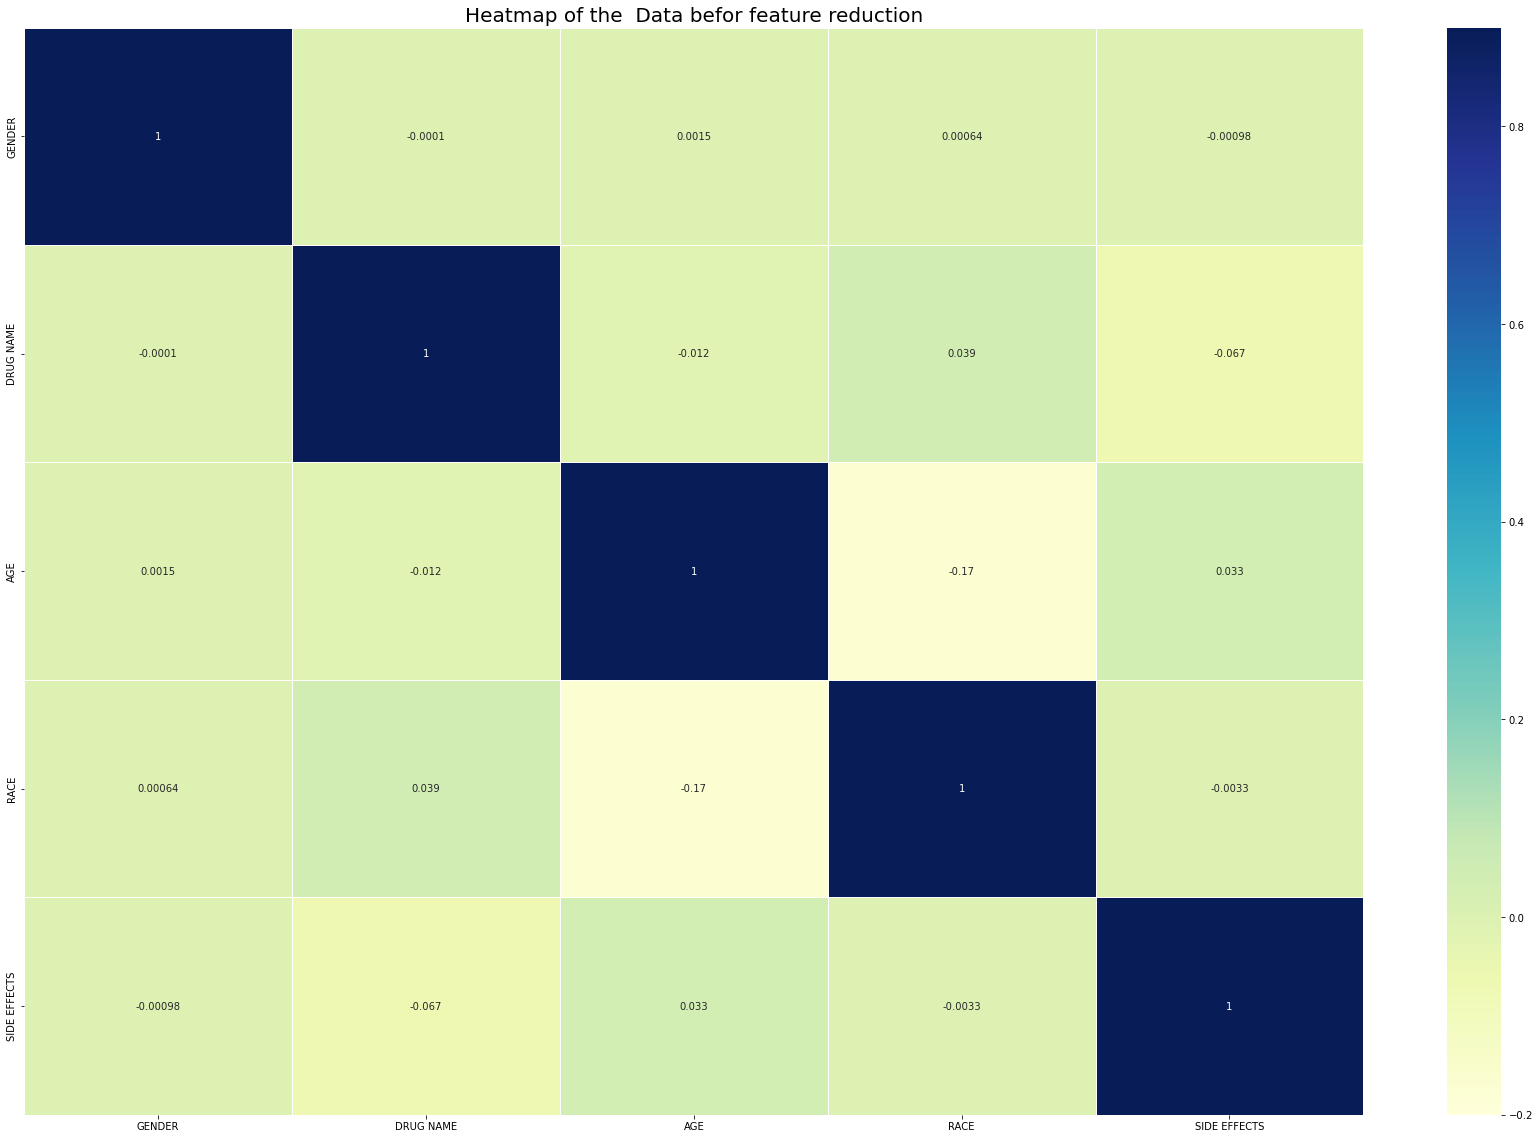

In [29]:
# Calculating the Correlation matrix using DataFrame.corr()
corrmatrix = data.corr()
# Creating Heatmap using seaborn & Correlation matrix
plt.figure(figsize=(30,20))
plt.title('Heatmap of the  Data befor feature reduction', fontsize=20)
colormap = sns.color_palette('ch:s=.25,rot=-.25')
sns.heatmap(corrmatrix,vmin=-0.2,vmax=0.9, annot=True, linewidth=0.75, cmap="YlGnBu")

# Inference

We can't drop any column.Because the dataset does'nt have any highly correlated features.

# Split the data

In [30]:
X = data.drop(['SIDE EFFECTS'], axis=1)

In [31]:
X.head()

,GENDER,DRUG NAME,AGE,RACE
0,1,435,41.0,8
1,1,491,53.0,5
2,0,425,31.0,8
3,0,470,44.0,8
4,1,439,24.0,8


In [32]:
y=data['SIDE EFFECTS']

In [33]:
y.head()

0    1
1    0
2    1
3    4
4    3
Name: SIDE EFFECTS, dtype: int32

# Training the models

In [34]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestClassifier

In [35]:
# Splitting the Dataframe
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.35, random_state=42)

In [36]:
import warnings
warnings.filterwarnings('ignore')

# Logistic Regression Classifier

In [37]:
# LogisticRegression
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

#Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00      7932
           1       0.34      0.96      0.50     46771
           2       0.00      0.00      0.00     26209
           3       0.33      0.04      0.08     40464
           4       0.03      0.00      0.00     18624

    accuracy                           0.33    140000
   macro avg       0.14      0.20      0.11    140000
weighted avg       0.21      0.33      0.19    140000

[[    0  7890    15    27     0]
 [    0 44897    13  1830    31]
 [    0 24889     0   985   335]
 [    0 38376     0  1725   363]
 [    0 17887     0   717    20]]
accuracy is 0.3331571428571429


# K-Nearest Neighbours Classifier

In [38]:
# K-Nearest Neighbours
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors=8)
classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.94      0.98      0.96      7932
           1       0.98      0.98      0.98     46771
           2       0.97      0.97      0.97     26209
           3       0.99      0.98      0.98     40464
           4       0.99      0.98      0.98     18624

    accuracy                           0.98    140000
   macro avg       0.97      0.98      0.98    140000
weighted avg       0.98      0.98      0.98    140000

[[ 7775    61    21    53    22]
 [  381 45963   158   196    73]
 [   37   420 25537   122    93]
 [   83   295   457 39580    49]
 [   39   146    82    89 18268]]
accuracy is 0.97945


# Random Forest Classifier

In [39]:
# Importing RandomForestClassifier sklearn.ensemble as RFC
from sklearn.ensemble import RandomForestClassifier as RFC
RModel=RFC(n_estimators=100, random_state=42)
# Training the model
RModel.fit(X_train,y_train)
y_Pred=RModel.predict(X_test)

In [40]:
# Summary of the predictions made by the classifier
print(classification_report(y_test, y_Pred))
print(confusion_matrix(y_test, y_Pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_Pred,y_test))

              precision    recall  f1-score   support

           0       0.96      0.97      0.97      7932
           1       0.99      0.99      0.99     46771
           2       0.99      0.97      0.98     26209
           3       0.98      0.99      0.99     40464
           4       0.99      0.99      0.99     18624

    accuracy                           0.99    140000
   macro avg       0.98      0.98      0.98    140000
weighted avg       0.99      0.99      0.99    140000

[[ 7694   163    10    40    25]
 [  246 46180   114   170    61]
 [   19   307 25447   371    65]
 [   28   137    50 40228    21]
 [   22    55    35    62 18450]]
accuracy is 0.9857071428571429


# Decision Tree Classifier

In [41]:
# Decision Tree's
from sklearn.tree import DecisionTreeClassifier

classifier = DecisionTreeClassifier()

classifier.fit(X_train, y_train)

y_pred = classifier.predict(X_test)

# Summary of the predictions made by the classifier
print(classification_report(y_test, y_pred))
print(confusion_matrix(y_test, y_pred))
# Accuracy score
from sklearn.metrics import accuracy_score
print('accuracy is',accuracy_score(y_pred,y_test))

              precision    recall  f1-score   support

           0       0.95      0.99      0.97      7932
           1       0.99      0.99      0.99     46771
           2       0.99      0.97      0.98     26209
           3       0.99      0.99      0.99     40464
           4       0.99      0.99      0.99     18624

    accuracy                           0.99    140000
   macro avg       0.98      0.99      0.98    140000
weighted avg       0.99      0.99      0.99    140000

[[ 7869    10     8    29    16]
 [  371 46104   100   138    58]
 [   19   310 25466   359    55]
 [   22   135    40 40255    12]
 [   22    46    39    63 18454]]
accuracy is 0.9867714285714285


# Summary:

In this project, we Build the classifier and fit the data  in to the model.

After implementing the logistic regression, K – Nearest Neighbour (KNN) , Random forest and decision tree classifiers,The Decision Tree classifier came outwith the best accuracy of prediction (Accuracy is 0.98677) .So we can use Decision Tree classifier for best predictions.

Thank you :)

submitted by Sayana C